In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

In [16]:
dataset = fetch_openml("mnist_784")
X, y = dataset["data"], dataset["target"]

In [17]:
type(dataset), type(["data"]), type(["target"])

(sklearn.utils.Bunch, list, list)

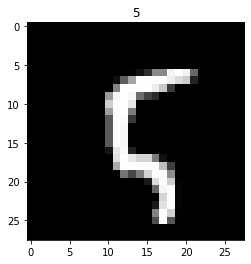

In [28]:
i = 100
img_1 = X[i,:].reshape(28,28)
plt.imshow(img_1, cmap='gray')
plt.title(y[i])
plt.show()

In [23]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )
    return L

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [21]:
#### mnist = fetch_mldata('MNIST original')
#### X, y = mnist["data"], mnist["target"]
#### 
#### X = X / 255

In [42]:
y

array([['5', '0', '4', ..., '4', '5', '6']], dtype=object)

In [8]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [48]:
y.shape

(1, 70000)

In [49]:
y[:,100]

array(['5'], dtype=object)

In [50]:
Y_new.shape

(10, 70000)

In [51]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [52]:
Y_new[5,100]

1.0

In [53]:
y[0,100]

'5'

In [29]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

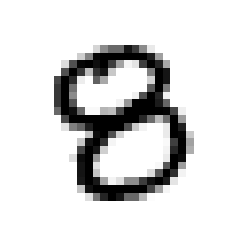

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [31]:
#import matplotlib 

i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)  #cmap = 'gray' 
plt.axis("off")
plt.show()
Y_train[:,i]

In [32]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

<ipython-input-23-d52dd8416396>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 0 cost:  7.0916961743518945
Epoch 100 cost:  0.8548047153188235
Epoch 200 cost:  0.6585139457848971
Epoch 300 cost:  0.5745098347175318
Epoch 400 cost:  0.531304282734425
Epoch 500 cost:  0.5038454204677062
Epoch 600 cost:  0.48543542397270273
Epoch 700 cost:  0.46919208565067294
Epoch 800 cost:  0.45614321203491676
Epoch 900 cost:  0.4458513874627217
Epoch 1000 cost:  0.43769047173079706
Epoch 1100 cost:  0.4297657313841642
Epoch 1200 cost:  0.42321172408113966
Epoch 1300 cost:  0.41697023220682067
Epoch 1400 cost:  0.41265163487930084
Epoch 1500 cost:  0.4078460416875898
Epoch 1600 cost:  0.40375693659408185
Epoch 1700 cost:  0.3996496940251407
Epoch 1800 cost:  0.3970787456228159
Epoch 1900 cost:  0.39479872272289657
Final cost: 0.3903285434478657


In [33]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 905    0   14    7    0   17   19    2   14    8]
 [   0 1082   11    5    1    7    4   11   13    4]
 [   7   16  869   21    8    8   22   25   31    5]
 [   9    5   35  871    3   62    4   17   46   11]
 [   3    0    9    2  835   22   19    9   15   82]
 [  16    2    5   46    5  687   15    4   44   16]
 [  26    3   25    4   34   22  864    1   16    4]
 [   2    5   22   20    6   16    0  897   17   39]
 [   8   22   38   28   12   42    9   13  761   27]
 [   4    0    4    6   78    9    2   49   17  813]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       986
           1       0.95      0.95      0.95      1138
           2       0.84      0.86      0.85      1012
           3       0.86      0.82      0.84      1063
           4       0.85      0.84      0.84       996
           5       0.77      0.82      0.79       840
           6       0.90      0.86      0.88       999
           7       0.87      0.88   

<ipython-input-23-d52dd8416396>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))
